### Importing Libraries

In [7]:
import os
import librosa
import pickle
import numpy as np
import pandas as pd
from pydub import AudioSegment
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

### Extract Mel Spectrogram features

In [8]:
# Define function to extract Spectral features from audio files
def extract_spec_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type="kaiser_fast")
    # print(audio.shape)
    spectral_features = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    spectral_features = spectral_features.T
    spectral_features = np.mean(spectral_features,axis=0)
    return spectral_features

### Extracting Mel Spectrogram features from the Actual data

In [9]:
# Load audio files and extract Mel Spectrogram features
X_spec_132 = []
y_spec_132 = []
i=1
level_path_132 = ["C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\No", 
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\Mild",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Moderate",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Severe",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Extreme"]

for level in level_path_132:
    for file in os.listdir(level):
        if file.startswith("Nonstress") or file.startswith("Stress"):
            file_path = os.path.join(level, file)
            # print(file_path)
            spec = extract_spec_features(file_path)
            X_spec_132.append(spec)
            y_spec_132.append(level.split("\\")[-2])

            print(i)
            i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


### Extracting Mel Spectrogram features from the Augmented data(Noise added data)

In [55]:
# Load audio files and extract Spectral features
X_A_spec_132 = []
y_A_spec_132 = []
i=1
level_path_132 = ["C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\No", 
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\Mild",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Moderate",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Severe",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Extreme"]

for level in level_path_132:
    for file in os.listdir(level):
        if file.startswith("A_Nonstress") or file.startswith("A_Stress"):
            file_path = os.path.join(level, file)
            # print(file_path)
            spec = extract_spec_features(file_path)
            X_A_spec_132.append(spec)
            y_A_spec_132.append(level.split("\\")[-2])

            print(i)
            i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


### Extracting Mel Spectrogram features from the Splitted Actual data

In [318]:
# Load audio files and extract Mel Spectrogram features
X_spec_1643 = []
y_spec_1643 = []
i=1
level_path = ["C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\No", 
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\Mild",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Moderate",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Severe",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Extreme"]

for level in level_path:
    for file in os.listdir(level):
        if file.startswith("Nonstress") or file.startswith("Stress"):
            file_path = os.path.join(level, file)
            # print(file_path)
            spec = extract_spec_features(file_path)
            X_spec_1643.append(spec)
            y_spec_1643.append(level.split("\\")[-2])

            print(i)
            i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


### Extracting Mel Spectrogram features from the Augmented Splitted data

In [59]:
# Load audio files and extract Mel Spectrogram features
X_A_spec_2315 = []
y_A_spec_2315 = []
i=1
level_path = ["C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\No", 
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\Mild",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Moderate",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Severe",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Extreme"]

for level in level_path:
    for file in os.listdir(level):
        if file.startswith("A_Nonstress") or file.startswith("A_Stress"):
            file_path = os.path.join(level, file)
            # print(file_path)
            spec = extract_spec_features(file_path)
            X_A_spec_2315.append(spec)
            y_A_spec_2315.append(level.split("\\")[-2])

            print(i)
            i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


# Actual Data(132)

In [139]:
y_spec_132_new = []
for i in y_spec_132:
    if i == "Nonstress":
        y_spec_132_new.append(0)
    elif i == "Stress":
        y_spec_132_new.append(1)

In [140]:
y_spec_132 = y_spec_132_new
print(y_spec_132)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [142]:
X_spec_132 = np.array(X_spec_132)
y_spec_132 = np.array(y_spec_132)

In [143]:
print(X_spec_132, y_spec_132)

[[1.80078104e-01 2.03332826e-01 1.57960266e-01 ... 2.41239450e-12
  2.27073633e-12 2.16173650e-12]
 [5.14776297e-02 1.47436485e-02 1.42552763e-01 ... 3.36561334e-12
  3.30336062e-12 3.27025538e-12]
 [1.17722936e-01 4.20614742e-02 2.95477882e-02 ... 4.46855904e-13
  4.31109087e-13 4.23787904e-13]
 ...
 [8.16267915e-03 2.14827899e-03 4.99884225e-03 ... 1.73818970e-14
  1.66343295e-14 1.61843161e-14]
 [1.80455614e-02 4.40558186e-03 3.05673480e-03 ... 7.44826756e-10
  3.98312598e-11 4.99080464e-12]
 [1.11654356e-01 4.48310673e-02 3.36765721e-02 ... 8.84741661e-13
  8.66318898e-13 8.54428887e-13]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [144]:
y_spec_132 = y_spec_132.reshape(1,132)

In [194]:
np.reshape(X_spec_132, (X_spec_132.shape[0], 1, X_spec_132.shape[1])).shape

(132, 1, 128)

In [195]:
np.reshape(y_spec_132, (y_spec_132.shape[1],)).shape

(132,)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_spec_132), y_spec_132[0], test_size=0.2)

### Support Vector Machine

In [323]:
SVM = SVC(kernel='linear', C=1, random_state=42)
SVM.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, SVM.predict(X_test)))
score = cross_val_score(SVM, X_spec_132, y_spec_132[0], cv=10)

print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, SVM.predict(X_train)))
print(classification_report(y_test, SVM.predict(X_test)))

Accuracy: 0.4444444444444444
Accuracy: 0.5434065934065935
              precision    recall  f1-score   support

           0       0.83      0.20      0.32        50
           1       0.57      0.96      0.72        55

    accuracy                           0.60       105
   macro avg       0.70      0.58      0.52       105
weighted avg       0.70      0.60      0.53       105

              precision    recall  f1-score   support

           0       0.60      0.19      0.29        16
           1       0.41      0.82      0.55        11

    accuracy                           0.44        27
   macro avg       0.50      0.50      0.42        27
weighted avg       0.52      0.44      0.39        27



### Random Forest

In [324]:
RandomForest = RandomForestClassifier(oob_score=True, random_state=42)
RandomForest.fit(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, RandomForest.predict(X_test)))
score = cross_val_score(RandomForest, X_spec_132, y_spec_132[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, RandomForest.predict(X_train)))
print(classification_report(y_test, RandomForest.predict(X_test)))

Accuracy: 0.5925925925925926
Accuracy: 0.5708791208791208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        55

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       0.69      0.56      0.62        16
           1       0.50      0.64      0.56        11

    accuracy                           0.59        27
   macro avg       0.60      0.60      0.59        27
weighted avg       0.61      0.59      0.60        27



### Decision Tree

In [325]:
DecisionTree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
DecisionTree.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, DecisionTree.predict(X_test)))
score = cross_val_score(DecisionTree, X_spec_132, y_spec_132[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, DecisionTree.predict(X_train)))
print(classification_report(y_test, DecisionTree.predict(X_test)))

Accuracy: 0.5555555555555556
Accuracy: 0.4258241758241758
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        55

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

              precision    recall  f1-score   support

           0       0.67      0.50      0.57        16
           1       0.47      0.64      0.54        11

    accuracy                           0.56        27
   macro avg       0.57      0.57      0.55        27
weighted avg       0.59      0.56      0.56        27



### Bernoulli Naive Bayes

In [326]:
from sklearn.naive_bayes import BernoulliNB

# Build a Bernoulli Classifier
Bernoullimodel = BernoulliNB()
Bernoullimodel.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, Bernoullimodel.predict(X_test)))
score = cross_val_score(Bernoullimodel,X_spec_132, y_spec_132[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, Bernoullimodel.predict(X_train)))
print(classification_report(y_test, Bernoullimodel.predict(X_test)))

Accuracy: 0.4074074074074074
Accuracy: 0.46923076923076923
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.52      1.00      0.69        55

    accuracy                           0.52       105
   macro avg       0.26      0.50      0.34       105
weighted avg       0.27      0.52      0.36       105

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.41      1.00      0.58        11

    accuracy                           0.41        27
   macro avg       0.20      0.50      0.29        27
weighted avg       0.17      0.41      0.24        27



C:\Users\SSN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SSN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SSN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Bidirectional long short-term memory 

In [327]:
# Assuming your features are stored in a variable called 'features'
# and your labels are stored in a variable called 'labels'

# Reshape features to match input shape of model
X = np.reshape(X_spec_132, (X_spec_132.shape[0], 1, X_spec_132.shape[1]))

# Reshape labels to match output shape of model
y = np.reshape(y_spec_132, (y_spec_132.shape[1],))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, 128)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
4/4 [==============================] - 23s 572ms/step - loss: 0.6920 - accuracy: 0.5143 - val_loss: 0.6880 - val_accuracy: 0.4444
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 0.6870 - accuracy: 0.6000 - val_loss: 0.6854 - val_accuracy: 0.4444
Epoch 3/10
4/4 [==============================] - 0s 22ms/step - loss: 0.6830 - accuracy: 0.6000 - val_loss: 0.6845 - val_accuracy: 0.4444
Epoch 4/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6789 - accuracy: 0.6000 - val_loss: 0.6818 - val_accuracy: 0.4444
Epoch 5/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6755 - accuracy: 0.6000 - val_loss: 0.6788 - val_accuracy: 0.4444
Epoch 6/10
4/4 [==============================] - 0s 21ms/step - loss: 0.6721 - accuracy: 0.6000 - val_loss: 0.6759 - val_accuracy: 0.4444
Epoch 7/10
4/4 [==============================] - 0s 19ms/step - loss: 0.6681 - accuracy: 0.6000 - val_loss: 0.6767 - val_accuracy: 0.4444
Epoch 8/10
4/4 [=========

In [328]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 0.6000
Train loss: 0.6560757756233215
Train accuracy: 0.6000000238418579


In [329]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

1/1 [==============================] - 0s 37ms/step - loss: 0.6790 - accuracy: 0.4444
Test loss: 0.6789799332618713
Test accuracy: 0.4444444477558136


In [330]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

1/1 [==============================] - 2s 2s/step


In [331]:
# print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.22      0.35        18
           1       0.36      0.89      0.52         9

    accuracy                           0.44        27
   macro avg       0.58      0.56      0.43        27
weighted avg       0.65      0.44      0.40        27



# Actual(132) + Splitted Actual(1643)

In [332]:
X_spec_1643_new = X_spec_1643
y_spec_1643_new = []

for i in y_spec_1643:
    if i == "Nonstress":
        y_spec_1643_new.append(0)
    elif i == "Stress":
        y_spec_1643_new.append(1)

In [333]:
X_spec_spactual = list(X_spec_132) + list(X_spec_1643) # sp - splitted plus
y_spec_spactual = list(y_spec_132[0]) + y_spec_1643_new

In [334]:
len(y_spec_spactual)

1775

In [335]:
X_spec_spactual = np.array(X_spec_spactual)
y_spec_spactual = np.array(y_spec_spactual)

In [336]:
y_spec_spactual.shape

(1775,)

In [337]:
y_spec_spactual = y_spec_spactual.reshape(1,1775)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_spec_spactual), y_spec_spactual[0], test_size=0.2)

### Support Vector Machine

In [339]:
# SVM
SVM = SVC(kernel='linear', C=1, random_state=42)
SVM.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, SVM.predict(X_test)))
score = cross_val_score(SVM, X_spec_spactual, y_spec_spactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, SVM.predict(X_train)))
print(classification_report(y_test, SVM.predict(X_test)))

Accuracy: 0.6169014084507042
Accuracy: 0.6236558115914429
              precision    recall  f1-score   support

           0       0.84      0.45      0.58       721
           1       0.62      0.91      0.73       699

    accuracy                           0.68      1420
   macro avg       0.73      0.68      0.66      1420
weighted avg       0.73      0.68      0.66      1420

              precision    recall  f1-score   support

           0       0.76      0.44      0.56       195
           1       0.55      0.83      0.66       160

    accuracy                           0.62       355
   macro avg       0.66      0.64      0.61       355
weighted avg       0.67      0.62      0.60       355



### Random Forest

In [340]:
RandomForest = RandomForestClassifier(oob_score=True, random_state=42)
RandomForest.fit(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, RandomForest.predict(X_test)))
score = cross_val_score(RandomForest, X_spec_spactual, y_spec_spactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, RandomForest.predict(X_train)))
print(classification_report(y_test, RandomForest.predict(X_test)))

Accuracy: 0.9098591549295775
Accuracy: 0.710264711483527
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       721
           1       1.00      1.00      1.00       699

    accuracy                           1.00      1420
   macro avg       1.00      1.00      1.00      1420
weighted avg       1.00      1.00      1.00      1420

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       195
           1       0.88      0.93      0.90       160

    accuracy                           0.91       355
   macro avg       0.91      0.91      0.91       355
weighted avg       0.91      0.91      0.91       355



### Decision Tree

In [341]:
DecisionTree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
DecisionTree.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, DecisionTree.predict(X_test)))
score = cross_val_score(DecisionTree, X_spec_spactual, y_spec_spactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, DecisionTree.predict(X_train)))
print(classification_report(y_test, DecisionTree.predict(X_test)))

Accuracy: 0.8
Accuracy: 0.6702977210690026
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       721
           1       0.95      0.99      0.97       699

    accuracy                           0.97      1420
   macro avg       0.97      0.97      0.97      1420
weighted avg       0.97      0.97      0.97      1420

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       195
           1       0.74      0.86      0.80       160

    accuracy                           0.80       355
   macro avg       0.80      0.81      0.80       355
weighted avg       0.81      0.80      0.80       355



### Bernoulli Naive Bayes

In [342]:
Bernoullimodel = BernoulliNB()
Bernoullimodel.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, Bernoullimodel.predict(X_test)))
score = cross_val_score(Bernoullimodel, X_spec_spactual, y_spec_spactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, Bernoullimodel.predict(X_train)))
print(classification_report(y_test, Bernoullimodel.predict(X_test)))

Accuracy: 0.4535211267605634
Accuracy: 0.4805656065511331
              precision    recall  f1-score   support

           0       0.73      0.01      0.02       721
           1       0.49      1.00      0.66       699

    accuracy                           0.50      1420
   macro avg       0.61      0.50      0.34      1420
weighted avg       0.61      0.50      0.34      1420

              precision    recall  f1-score   support

           0       1.00      0.01      0.01       195
           1       0.45      1.00      0.62       160

    accuracy                           0.45       355
   macro avg       0.73      0.50      0.32       355
weighted avg       0.75      0.45      0.29       355



### Bidirectional long short-term memory 

In [343]:
X = np.reshape(X_spec_spactual, (X_spec_spactual.shape[0], 1, X_spec_spactual.shape[1]))

y = np.reshape(y_spec_spactual, (y_spec_spactual.shape[1],))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, 128)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
45/45 [==============================] - 11s 44ms/step - loss: 0.6695 - accuracy: 0.5634 - val_loss: 0.6389 - val_accuracy: 0.6761
Epoch 2/10
45/45 [==============================] - 0s 6ms/step - loss: 0.6471 - accuracy: 0.5965 - val_loss: 0.6217 - val_accuracy: 0.6761
Epoch 3/10
45/45 [==============================] - 0s 6ms/step - loss: 0.6334 - accuracy: 0.6120 - val_loss: 0.6114 - val_accuracy: 0.6479
Epoch 4/10
45/45 [==============================] - 0s 6ms/step - loss: 0.6189 - accuracy: 0.6352 - val_loss: 0.5982 - val_accuracy: 0.6535
Epoch 5/10
45/45 [==============================] - 0s 6ms/step - loss: 0.6032 - accuracy: 0.6500 - val_loss: 0.5821 - val_accuracy: 0.6958
Epoch 6/10
45/45 [==============================] - 0s 7ms/step - loss: 0.5819 - accuracy: 0.6704 - val_loss: 0.5814 - val_accuracy: 0.7239
Epoch 7/10
45/45 [==============================] - 0s 6ms/step - loss: 0.5754 - accuracy: 0.6817 - val_loss: 0.5602 - val_accuracy: 0.7268
Epoch 8/10
45/45 [

In [345]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

45/45 [==============================] - 0s 4ms/step - loss: 0.5404 - accuracy: 0.7162
Train loss: 0.5404002666473389
Train accuracy: 0.7161971926689148


In [344]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

12/12 [==============================] - 0s 3ms/step - loss: 0.5620 - accuracy: 0.7437
Test loss: 0.5620097517967224
Test accuracy: 0.7436619997024536


In [346]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

12/12 [==============================] - 2s 2ms/step


In [347]:
# print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.60      0.71       186
           1       0.67      0.90      0.77       169

    accuracy                           0.74       355
   macro avg       0.77      0.75      0.74       355
weighted avg       0.78      0.74      0.74       355



# Actual(132) + Augmented Splitted(2315)

In [348]:
X_A_spec_2315_new = X_A_spec_2315
y_A_spec_2315_new = []

for i in y_A_spec_2315:
    if i == "Nonstress":
        y_A_spec_2315_new.append(0)
    elif i == "Stress":
        y_A_spec_2315_new.append(1)

In [349]:
X_spec_augspactual = list(X_spec_132) + list(X_A_spec_2315) # sp - splitted plus
y_spec_augspactual = list(y_spec_132[0]) + y_A_spec_2315_new

In [350]:
len(y_spec_augspactual)

2447

In [351]:
X_spec_augspactual = np.array(X_spec_augspactual)
y_spec_augspactual = np.array(y_spec_augspactual)

In [352]:
y_spec_augspactual.shape

(2447,)

In [353]:
y_spec_augspactual = y_spec_augspactual.reshape(1,2447)

In [354]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X_spec_augspactual), y_spec_augspactual[0], test_size=0.2)

### Support Vector Machine

In [355]:
# SVM
SVM = SVC(kernel='linear', C=1, random_state=42)
SVM.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, SVM.predict(X_test)))
score = cross_val_score(SVM, X_spec_augspactual, y_spec_augspactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, SVM.predict(X_train)))
print(classification_report(y_test, SVM.predict(X_test)))

Accuracy: 0.673469387755102
Accuracy: 0.628469387755102
              precision    recall  f1-score   support

           0       0.83      0.44      0.57       957
           1       0.63      0.91      0.75      1000

    accuracy                           0.68      1957
   macro avg       0.73      0.68      0.66      1957
weighted avg       0.73      0.68      0.66      1957

              precision    recall  f1-score   support

           0       0.82      0.41      0.55       235
           1       0.63      0.91      0.74       255

    accuracy                           0.67       490
   macro avg       0.72      0.66      0.65       490
weighted avg       0.72      0.67      0.65       490



### Random Forest

In [356]:
RandomForest = RandomForestClassifier(oob_score=True, random_state=42)
RandomForest.fit(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, RandomForest.predict(X_test)))
score = cross_val_score(RandomForest, X_spec_augspactual, y_spec_augspactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, RandomForest.predict(X_train)))
print(classification_report(y_test, RandomForest.predict(X_test)))

Accuracy: 0.9244897959183673
Accuracy: 0.683660086985614
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       957
           1       1.00      1.00      1.00      1000

    accuracy                           1.00      1957
   macro avg       1.00      1.00      1.00      1957
weighted avg       1.00      1.00      1.00      1957

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       235
           1       0.92      0.94      0.93       255

    accuracy                           0.92       490
   macro avg       0.92      0.92      0.92       490
weighted avg       0.92      0.92      0.92       490



### Decision Tree

In [357]:
DecisionTree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
DecisionTree.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, DecisionTree.predict(X_test)))
score = cross_val_score(DecisionTree, X_spec_augspactual, y_spec_augspactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, DecisionTree.predict(X_train)))
print(classification_report(y_test, DecisionTree.predict(X_test)))

Accuracy: 0.8142857142857143
Accuracy: 0.6031398461023755
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       957
           1       0.98      0.97      0.98      1000

    accuracy                           0.98      1957
   macro avg       0.98      0.98      0.98      1957
weighted avg       0.98      0.98      0.98      1957

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       235
           1       0.82      0.82      0.82       255

    accuracy                           0.81       490
   macro avg       0.81      0.81      0.81       490
weighted avg       0.81      0.81      0.81       490



### Bernoulli Naive Bayes

In [358]:
Bernoullimodel = BernoulliNB()
Bernoullimodel.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, Bernoullimodel.predict(X_test)))
score = cross_val_score(Bernoullimodel, X_spec_augspactual, y_spec_augspactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, Bernoullimodel.predict(X_train)))
print(classification_report(y_test, Bernoullimodel.predict(X_test)))

Accuracy: 0.48367346938775513
Accuracy: 0.4863081298093007
              precision    recall  f1-score   support

           0       0.49      1.00      0.66       957
           1       1.00      0.01      0.01      1000

    accuracy                           0.49      1957
   macro avg       0.75      0.50      0.34      1957
weighted avg       0.75      0.49      0.33      1957

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       235
           1       1.00      0.01      0.02       255

    accuracy                           0.48       490
   macro avg       0.74      0.50      0.33       490
weighted avg       0.75      0.48      0.32       490



### Bidirectional long short-term memory 

In [404]:
X = np.reshape(X_spec_augspactual, (X_spec_augspactual.shape[0], 1, X_spec_augspactual.shape[1]))

y = np.reshape(y_spec_augspactual, (y_spec_augspactual.shape[1],))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, 128)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
62/62 [==============================] - 21s 37ms/step - loss: 0.6700 - accuracy: 0.5779 - val_loss: 0.6476 - val_accuracy: 0.6102
Epoch 2/10
62/62 [==============================] - 0s 7ms/step - loss: 0.6391 - accuracy: 0.6086 - val_loss: 0.6305 - val_accuracy: 0.6224
Epoch 3/10
62/62 [==============================] - 0s 6ms/step - loss: 0.6223 - accuracy: 0.6341 - val_loss: 0.6116 - val_accuracy: 0.6306
Epoch 4/10
62/62 [==============================] - 0s 6ms/step - loss: 0.6079 - accuracy: 0.6505 - val_loss: 0.6032 - val_accuracy: 0.6429
Epoch 5/10
62/62 [==============================] - 0s 8ms/step - loss: 0.5991 - accuracy: 0.6730 - val_loss: 0.6006 - val_accuracy: 0.6571
Epoch 6/10
62/62 [==============================] - 0s 6ms/step - loss: 0.5895 - accuracy: 0.6689 - val_loss: 0.5883 - val_accuracy: 0.6796
Epoch 7/10
62/62 [==============================] - 0s 7ms/step - loss: 0.5762 - accuracy: 0.6944 - val_loss: 0.5764 - val_accuracy: 0.6939
Epoch 8/10
62/62 [

In [405]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

62/62 [==============================] - 0s 3ms/step - loss: 0.5493 - accuracy: 0.7200
Train loss: 0.5492628812789917
Train accuracy: 0.7199795842170715


In [406]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

16/16 [==============================] - 0s 4ms/step - loss: 0.5468 - accuracy: 0.7286
Test loss: 0.5468403697013855
Test accuracy: 0.7285714149475098


In [407]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

16/16 [==============================] - 2s 3ms/step


In [408]:
# print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.56      0.67       243
           1       0.67      0.90      0.77       247

    accuracy                           0.73       490
   macro avg       0.76      0.73      0.72       490
weighted avg       0.76      0.73      0.72       490



# Actual(132) + Augmented(Noise added Data)(132)

In [359]:
y_A_spec_132_new = []

for i in y_A_spec_132:
    if i == "Nonstress":
        y_A_spec_132_new.append(0)
    elif i == "Stress":
        y_A_spec_132_new.append(1)

In [245]:
X_spec_264 = list(X_spec_132) + list(X_A_spec_132) # sp - splitted plus
y_spec_264 = list(y_spec_132[0]) + y_A_spec_132_new

In [360]:
len(X_spec_264)

264

In [361]:
X_spec_264 = np.array(X_spec_264)
y_spec_264 = np.array(y_spec_264)

In [363]:
y_spec_264 = y_spec_264.reshape(1,264)

In [365]:

X_train, X_test, y_train, y_test = train_test_split(np.array(X_spec_264), y_spec_264[0], test_size=0.2)


### Support Vector Machine

In [366]:
# SVM
SVM = SVC(kernel='linear', C=1, random_state=42)
SVM.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, SVM.predict(X_test)))
score = cross_val_score(SVM, X_spec_264, y_spec_264[0], cv=10)

print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, SVM.predict(X_train)))
print(classification_report(y_test, SVM.predict(X_test)))

Accuracy: 0.6415094339622641
Accuracy: 0.5675213675213675
              precision    recall  f1-score   support

           0       0.86      0.24      0.37       106
           1       0.55      0.96      0.70       105

    accuracy                           0.60       211
   macro avg       0.71      0.60      0.54       211
weighted avg       0.71      0.60      0.54       211

              precision    recall  f1-score   support

           0       0.82      0.35      0.49        26
           1       0.60      0.93      0.72        27

    accuracy                           0.64        53
   macro avg       0.71      0.64      0.61        53
weighted avg       0.70      0.64      0.61        53



### Random Forest

In [367]:
RandomForest = RandomForestClassifier(oob_score=True, random_state=42)
RandomForest.fit(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, RandomForest.predict(X_test)))
score = cross_val_score(RandomForest, X_spec_264, y_spec_264[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, RandomForest.predict(X_train)))
print(classification_report(y_test, RandomForest.predict(X_test)))

Accuracy: 0.7924528301886793
Accuracy: 0.8366096866096866
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       105

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.83      0.74      0.78        27

    accuracy                           0.79        53
   macro avg       0.80      0.79      0.79        53
weighted avg       0.80      0.79      0.79        53



### Decision Tree

In [368]:
DecisionTree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
DecisionTree.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, DecisionTree.predict(X_test)))
score = cross_val_score(DecisionTree, X_spec_264, y_spec_264[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, DecisionTree.predict(X_train)))
print(classification_report(y_test, DecisionTree.predict(X_test)))

Accuracy: 0.8113207547169812
Accuracy: 0.7797720797720797
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       105

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.81      0.81      0.81        27

    accuracy                           0.81        53
   macro avg       0.81      0.81      0.81        53
weighted avg       0.81      0.81      0.81        53



### Bernoulli Naive Bayes

In [369]:
Bernoullimodel = BernoulliNB()
Bernoullimodel.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, Bernoullimodel.predict(X_test)))
score = cross_val_score(Bernoullimodel, X_spec_264, y_spec_264[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, Bernoullimodel.predict(X_train)))
print(classification_report(y_test, Bernoullimodel.predict(X_test)))

Accuracy: 0.49056603773584906
Accuracy: 0.4925925925925926
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       106
           1       0.00      0.00      0.00       105

    accuracy                           0.50       211
   macro avg       0.25      0.50      0.33       211
weighted avg       0.25      0.50      0.34       211

              precision    recall  f1-score   support

           0       0.49      1.00      0.66        26
           1       0.00      0.00      0.00        27

    accuracy                           0.49        53
   macro avg       0.25      0.50      0.33        53
weighted avg       0.24      0.49      0.32        53



C:\Users\SSN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SSN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SSN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### Bidirectional long short-term memory 

In [370]:
X = np.reshape(X_spec_264, (X_spec_264.shape[0], 1, X_spec_264.shape[1]))

y = np.reshape(y_spec_264, (y_spec_264.shape[1],))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, 128)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
7/7 [==============================] - 20s 272ms/step - loss: 0.6906 - accuracy: 0.4834 - val_loss: 0.6897 - val_accuracy: 0.5094
Epoch 2/10
7/7 [==============================] - 0s 14ms/step - loss: 0.6834 - accuracy: 0.5024 - val_loss: 0.6857 - val_accuracy: 0.5283
Epoch 3/10
7/7 [==============================] - 0s 14ms/step - loss: 0.6779 - accuracy: 0.5782 - val_loss: 0.6815 - val_accuracy: 0.6038
Epoch 4/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6735 - accuracy: 0.6066 - val_loss: 0.6763 - val_accuracy: 0.7170
Epoch 5/10
7/7 [==============================] - 0s 12ms/step - loss: 0.6686 - accuracy: 0.6351 - val_loss: 0.6721 - val_accuracy: 0.6981
Epoch 6/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6651 - accuracy: 0.6303 - val_loss: 0.6693 - val_accuracy: 0.6981
Epoch 7/10
7/7 [==============================] - 0s 15ms/step - loss: 0.6618 - accuracy: 0.5735 - val_loss: 0.6696 - val_accuracy: 0.6038
Epoch 8/10
7/7 [=========

In [371]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

7/7 [==============================] - 0s 4ms/step - loss: 0.6460 - accuracy: 0.5782
Train loss: 0.6459794044494629
Train accuracy: 0.578199028968811


In [372]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.6659 - accuracy: 0.6226
Test loss: 0.6658831238746643
Test accuracy: 0.6226415038108826


In [373]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

2/2 [==============================] - 2s 4ms/step


In [374]:
# print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.37      0.50        27
           1       0.57      0.88      0.70        26

    accuracy                           0.62        53
   macro avg       0.67      0.63      0.60        53
weighted avg       0.67      0.62      0.60        53



# Actual(132) + Augmented Noise Added(132) + Whole Splitted Data(3958)

In [256]:
y_A_spec_2315_new = []

for i in y_A_spec_2315:
    if i == "Nonstress":
        y_A_spec_2315_new.append(0)
    elif i == "Stress":
        y_A_spec_2315_new.append(1)

In [375]:
X_spec_spaugactual = list(X_spec_264) + list(X_spec_1643) + list(X_A_spec_2315) # sp - splitted plus
y_spec_spaugactual = list(y_spec_264[0]) + list(y_spec_1643_new) + list(y_A_spec_2315_new)

In [376]:
X_spec_spaugactual = np.array(X_spec_spaugactual)
y_spec_spaugactual = np.array(y_spec_spaugactual)

In [377]:
y_spec_spaugactual.shape

(4222,)

In [378]:
y_spec_spaugactual = y_spec_spaugactual.reshape(1,4222)

In [411]:

X_train, X_test, y_train, y_test = train_test_split(np.array(X_spec_spaugactual), y_spec_spaugactual[0], test_size=0.2)


### Support Vector Machine

In [380]:
SVM = SVC(kernel='linear', C=1, random_state=42)
SVM.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, SVM.predict(X_test)))
score = cross_val_score(SVM, X_spec_spaugactual, y_spec_spaugactual[0], cv=10)

print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, SVM.predict(X_train)))
print(classification_report(y_test, SVM.predict(X_test)))

Accuracy: 0.6804733727810651
Accuracy: 0.6728838246333456
              precision    recall  f1-score   support

           0       0.82      0.48      0.61      1681
           1       0.64      0.89      0.74      1696

    accuracy                           0.69      3377
   macro avg       0.73      0.69      0.68      3377
weighted avg       0.73      0.69      0.68      3377

              precision    recall  f1-score   support

           0       0.82      0.47      0.60       427
           1       0.62      0.89      0.73       418

    accuracy                           0.68       845
   macro avg       0.72      0.68      0.67       845
weighted avg       0.72      0.68      0.67       845



### Random Forest

In [412]:
RandomForest = RandomForestClassifier(oob_score=True, random_state=42)
RandomForest.fit(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, RandomForest.predict(X_test)))
score = cross_val_score(RandomForest, X_spec_spaugactual, y_spec_spaugactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, RandomForest.predict(X_train)))
print(classification_report(y_test, RandomForest.predict(X_test)))

Accuracy: 0.9479289940828403
Accuracy: 0.8633065555219434
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1676
           1       1.00      1.00      1.00      1701

    accuracy                           1.00      3377
   macro avg       1.00      1.00      1.00      3377
weighted avg       1.00      1.00      1.00      3377

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       432
           1       0.94      0.96      0.95       413

    accuracy                           0.95       845
   macro avg       0.95      0.95      0.95       845
weighted avg       0.95      0.95      0.95       845



### Confusion Matrix of Random Forest Classifier (Accuracy "95%" and Average Cross Validation Score "86%")

C:\Users\SSN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)




			0 - Nonstress 
			1 - Stress


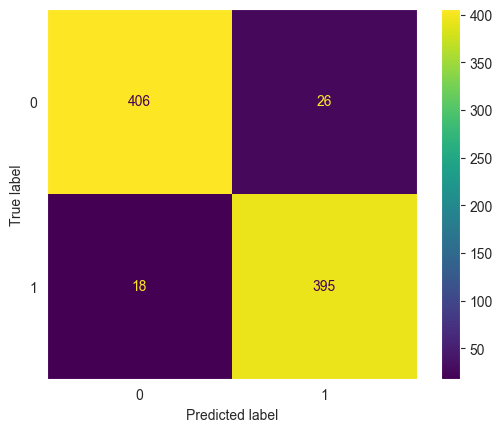

In [427]:
# plot_confusion_matrix function is used to visualize the confusion matrix
CM = confusion_matrix(y_test, RandomForest.predict(X_test))
TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

plot_confusion_matrix(RandomForest, X_test, y_test)
print("\n\n\t\t\t0 - Nonstress \n\t\t\t1 - Stress")
plt.grid(False)
plt.show()

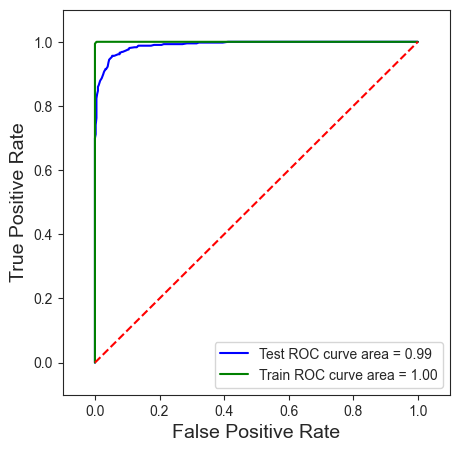

In [431]:

preds_train = RandomForest.predict(X_train)
# calculate prediction probability
prob_train = np.squeeze(RandomForest.predict_proba(X_train)[:,1].reshape(1,-1))
prob_test = np.squeeze(RandomForest.predict_proba(X_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = roc_curve(y_test, prob_test, pos_label=1)
fpr2, tpr2, thresholds2 = roc_curve(y_train, prob_train, pos_label=1)
# auc score
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(5,5))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()
sns.set_style('darkgrid')
sns.set_style('ticks')

### Converting the Random Forest model into pickle file

In [432]:
import pickle
file_name = 'RF_Model_MS95.pkl'
pickle.dump(RandomForest, open(file_name, 'wb'))

### Decision Tree

In [382]:
DecisionTree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
DecisionTree.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, DecisionTree.predict(X_test)))
score = cross_val_score(DecisionTree, X_spec_spaugactual, y_spec_spaugactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, DecisionTree.predict(X_train)))
print(classification_report(y_test, DecisionTree.predict(X_test)))

Accuracy: 0.8757396449704142
Accuracy: 0.7740148790516844
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1681
           1       0.95      0.98      0.96      1696

    accuracy                           0.96      3377
   macro avg       0.96      0.96      0.96      3377
weighted avg       0.96      0.96      0.96      3377

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       427
           1       0.86      0.89      0.88       418

    accuracy                           0.88       845
   macro avg       0.88      0.88      0.88       845
weighted avg       0.88      0.88      0.88       845



### Bernoulli Naive Bayes

In [383]:
Bernoullimodel = BernoulliNB()
Bernoullimodel.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, Bernoullimodel.predict(X_test)))
score = cross_val_score(Bernoullimodel, X_spec_spaugactual, y_spec_spaugactual[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, Bernoullimodel.predict(X_train)))
print(classification_report(y_test, Bernoullimodel.predict(X_test)))

Accuracy: 0.5053254437869823
Accuracy: 0.4950242568877236
              precision    recall  f1-score   support

           0       0.50      1.00      0.66      1681
           1       0.57      0.00      0.01      1696

    accuracy                           0.50      3377
   macro avg       0.53      0.50      0.34      3377
weighted avg       0.53      0.50      0.34      3377

              precision    recall  f1-score   support

           0       0.51      0.99      0.67       427
           1       0.50      0.01      0.01       418

    accuracy                           0.51       845
   macro avg       0.50      0.50      0.34       845
weighted avg       0.50      0.51      0.35       845



### Bidirectional long short-term memory 

In [384]:
X = np.reshape(X_spec_spaugactual, (X_spec_spaugactual.shape[0], 1, X_spec_spaugactual.shape[1]))

y = np.reshape(y_spec_spaugactual, (y_spec_spaugactual.shape[1],))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, 128)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
106/106 [==============================] - 12s 25ms/step - loss: 0.6566 - accuracy: 0.5840 - val_loss: 0.6329 - val_accuracy: 0.6130
Epoch 2/10
106/106 [==============================] - 1s 5ms/step - loss: 0.6163 - accuracy: 0.6373 - val_loss: 0.6224 - val_accuracy: 0.6284
Epoch 3/10
106/106 [==============================] - 1s 6ms/step - loss: 0.5937 - accuracy: 0.6689 - val_loss: 0.5994 - val_accuracy: 0.6568
Epoch 4/10
106/106 [==============================] - 1s 8ms/step - loss: 0.5733 - accuracy: 0.6962 - val_loss: 0.5836 - val_accuracy: 0.6899
Epoch 5/10
106/106 [==============================] - 1s 6ms/step - loss: 0.5566 - accuracy: 0.7125 - val_loss: 0.5683 - val_accuracy: 0.6994
Epoch 6/10
106/106 [==============================] - 1s 6ms/step - loss: 0.5442 - accuracy: 0.7240 - val_loss: 0.5582 - val_accuracy: 0.7077
Epoch 7/10
106/106 [==============================] - 1s 5ms/step - loss: 0.5383 - accuracy: 0.7169 - val_loss: 0.5481 - val_accuracy: 0.7136
Epoc

In [385]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

106/106 [==============================] - 0s 3ms/step - loss: 0.5153 - accuracy: 0.7391
Train loss: 0.515346348285675
Train accuracy: 0.7391175627708435


In [386]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

27/27 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7219
Test loss: 0.5304086804389954
Test accuracy: 0.7218934893608093


In [387]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

27/27 [==============================] - 12s 3ms/step


In [388]:
# print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.64      0.70       431
           1       0.68      0.81      0.74       414

    accuracy                           0.72       845
   macro avg       0.73      0.72      0.72       845
weighted avg       0.73      0.72      0.72       845



# Actual(132) + Augmented(132) + Actual Splitted(1643)

In [389]:
X_spec_spaugactual1 = list(X_spec_264) + list(X_spec_1643) 
y_spec_spaugactual1 = list(y_spec_264[0]) + list(y_spec_1643_new) 

In [390]:
X_spec_spaugactual1 = np.array(X_spec_spaugactual1)
y_spec_spaugactual1 = np.array(y_spec_spaugactual1)

In [391]:
y_spec_spaugactual1 = y_spec_spaugactual1.reshape(1,1907)

In [399]:
# np.random.seed(40)
X_train, X_test, y_train, y_test = train_test_split(np.array(X_spec_spaugactual1), y_spec_spaugactual1[0], test_size=0.2)


### Support Vector Machine

In [400]:
SVM = SVC(kernel='linear', C=1, random_state=42)
SVM.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, SVM.predict(X_test)))
score = cross_val_score(SVM, X_spec_spaugactual1, y_spec_spaugactual1[0], cv=10)

print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, SVM.predict(X_train)))
print(classification_report(y_test, SVM.predict(X_test)))

Accuracy: 0.693717277486911
Accuracy: 0.6386470101956462
              precision    recall  f1-score   support

           0       0.82      0.44      0.58       781
           1       0.61      0.90      0.72       744

    accuracy                           0.67      1525
   macro avg       0.71      0.67      0.65      1525
weighted avg       0.72      0.67      0.65      1525

              precision    recall  f1-score   support

           0       0.89      0.48      0.62       201
           1       0.62      0.93      0.74       181

    accuracy                           0.69       382
   macro avg       0.75      0.71      0.68       382
weighted avg       0.76      0.69      0.68       382



### Random Forest

In [401]:
RandomForest = RandomForestClassifier(oob_score=True, random_state=42)
RandomForest.fit(X_train,y_train)
print("Accuracy:",accuracy_score(y_test, RandomForest.predict(X_test)))
score = cross_val_score(RandomForest, X_spec_spaugactual1, y_spec_spaugactual1[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, RandomForest.predict(X_train)))
print(classification_report(y_test, RandomForest.predict(X_test)))

Accuracy: 0.9240837696335078
Accuracy: 0.7313833011848995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       781
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1525
   macro avg       1.00      1.00      1.00      1525
weighted avg       1.00      1.00      1.00      1525

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       201
           1       0.90      0.94      0.92       181

    accuracy                           0.92       382
   macro avg       0.92      0.92      0.92       382
weighted avg       0.92      0.92      0.92       382



### Decision Tree

In [402]:
DecisionTree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
DecisionTree.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, DecisionTree.predict(X_test)))
score = cross_val_score(DecisionTree, X_spec_spaugactual1, y_spec_spaugactual1[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, DecisionTree.predict(X_train)))
print(classification_report(y_test, DecisionTree.predict(X_test)))

Accuracy: 0.8664921465968587
Accuracy: 0.6815651694681731
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       781
           1       0.99      0.98      0.99       744

    accuracy                           0.99      1525
   macro avg       0.99      0.99      0.99      1525
weighted avg       0.99      0.99      0.99      1525

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       201
           1       0.85      0.88      0.86       181

    accuracy                           0.87       382
   macro avg       0.87      0.87      0.87       382
weighted avg       0.87      0.87      0.87       382



### Bernoulli Naive Bayes

In [403]:
from sklearn.naive_bayes import BernoulliNB

# Build a Bernoulli Classifier
Bernoullimodel = BernoulliNB()
Bernoullimodel.fit(X_train, y_train)
print("Accuracy:",accuracy_score(y_test, Bernoullimodel.predict(X_test)))
score = cross_val_score(Bernoullimodel, X_spec_spaugactual1, y_spec_spaugactual1[0], cv=10)
print(f"Accuracy: {score.mean()}")
print(classification_report(y_train, Bernoullimodel.predict(X_train)))
print(classification_report(y_test, Bernoullimodel.predict(X_test)))

Accuracy: 0.4738219895287958
Accuracy: 0.4813805456048498
              precision    recall  f1-score   support

           0       0.80      0.01      0.02       781
           1       0.49      1.00      0.66       744

    accuracy                           0.49      1525
   macro avg       0.64      0.50      0.34      1525
weighted avg       0.65      0.49      0.33      1525

              precision    recall  f1-score   support

           0       0.50      0.00      0.01       201
           1       0.47      0.99      0.64       181

    accuracy                           0.47       382
   macro avg       0.49      0.50      0.33       382
weighted avg       0.49      0.47      0.31       382



### Bidirectional long short-term memory 

In [458]:
X = np.reshape(X_spec_spaugactual1, (X_spec_spaugactual1.shape[0], 1, X_spec_spaugactual.shape[1]))

y = np.reshape(y_spec_spaugactual1, (y_spec_spaugactual1.shape[1],))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(1, 128)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
48/48 [==============================] - 11s 47ms/step - loss: 0.6683 - accuracy: 0.5567 - val_loss: 0.6603 - val_accuracy: 0.5759
Epoch 2/10
48/48 [==============================] - 0s 7ms/step - loss: 0.6459 - accuracy: 0.6479 - val_loss: 0.6449 - val_accuracy: 0.6283
Epoch 3/10
48/48 [==============================] - 0s 6ms/step - loss: 0.6292 - accuracy: 0.6334 - val_loss: 0.6288 - val_accuracy: 0.6545
Epoch 4/10
48/48 [==============================] - 0s 6ms/step - loss: 0.6126 - accuracy: 0.6525 - val_loss: 0.6152 - val_accuracy: 0.6545
Epoch 5/10
48/48 [==============================] - 0s 6ms/step - loss: 0.5939 - accuracy: 0.6675 - val_loss: 0.6023 - val_accuracy: 0.6571
Epoch 6/10
48/48 [==============================] - 0s 7ms/step - loss: 0.5726 - accuracy: 0.6911 - val_loss: 0.5924 - val_accuracy: 0.6806
Epoch 7/10
48/48 [==============================] - 0s 7ms/step - loss: 0.5576 - accuracy: 0.7148 - val_loss: 0.5885 - val_accuracy: 0.6832
Epoch 8/10
48/48 [

In [459]:
loss, accuracy = model.evaluate(X_train, y_train)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

48/48 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7252
Train loss: 0.5316058993339539
Train accuracy: 0.7252458930015564


In [460]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

12/12 [==============================] - 0s 4ms/step - loss: 0.5926 - accuracy: 0.6832
Test loss: 0.5926494598388672
Test accuracy: 0.6832460761070251


In [461]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

12/12 [==============================] - 2s 4ms/step


In [462]:
# print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       184
           1       0.70      0.68      0.69       198

    accuracy                           0.68       382
   macro avg       0.68      0.68      0.68       382
weighted avg       0.68      0.68      0.68       382



# Phase - 2

In [ ]:
# Data Annotation in Excel sheet using the below formula
# =IF(D2>=20,"Extreme",IF(D2>=15,"Severe",IF(D2>=10,"Moderate",IF(D2>=5,"Mild","No"))))

#### Data Annotation in Excel sheet using the below formula:
` =IF(D2>=20,"Extreme",IF(D2>=15,"Severe",IF(D2>=10,"Moderate",IF(D2>=5,"Mild","No"))))`

### Extracting Mel Spectrogram features from the Whole dataset

In [433]:
# Load audio files and extract Spectral features
X = []
y = []
i=1
level_path = ["C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\No", 
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Nonstress\\Mild",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Moderate",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Severe",
              "C:\\Users\\SSN\\E-DAIC1\\Phase2\\Stress\\Extreme",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\No", 
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Nonstress\\Mild",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Moderate",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Severe",
              "C:\\Users\\SSN\\E-DAIC1\\E-DAIC-SPLITTED\\Stress\\Extreme"]

for level in level_path:
    for file in os.listdir(level):
        # print(level.split("\\")[-2], level.split("\\")[-1] )
        file_path = os.path.join(level, file)
        # print(file_path)
        spec = extract_spec_features(file_path)
        X.append(spec)
        y.append([level.split("\\")[-2], level.split("\\")[-1]])
        print(i)
        i+=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [434]:
# First phase random forest model - MS features
loaded_model = pickle.load(open('RF_Model_MS95.pkl','rb'))
loaded_model


RandomForestClassifier(oob_score=True, random_state=42)

In [435]:
# Stress level of speech data
y1 = []
for state, level in y:
    y1.append(level)

In [438]:
# "Stress state" of each speech MS feature predicted by first phase Random Forest model
y2 = []
for x in X:
    stress_state = loaded_model.predict([x])
    if stress_state[0] == 0:
        y2.append(0)
    else:
        y2.append(1)
print(y2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [439]:
# Combine the stress label with the original speech features
X_combined = pd.concat([pd.DataFrame(X), pd.Series(y2)], axis=1).values
y_severity = y1

# Split the data into training and testing sets
X_train_comb, X_test_comb, y_train_sev, y_test_sev = train_test_split(X_combined, y_severity, test_size=0.2, random_state=42)


### Support Vector Machine

In [445]:
SVM = SVC(kernel='linear', C=1, probability=True, random_state=42)
SVM.fit(X_train_comb, y_train_sev)   
score = cross_val_score(SVM, X_train_comb, y_train_sev, cv=10)
print(f"Accuracy based on cross_val_score : {score.mean()}")

y_pred_sev = SVM.predict(X_test_comb)
acc_sev = accuracy_score(y_test_sev, y_pred_sev)
print("Accuracy :",acc_sev)
print(classification_report(y_train_sev, SVM.predict(X_train_comb)))
print(classification_report(y_test_sev, SVM.predict(X_test_comb)))


Accuracy based on cross_val_score : 0.6200647902656578
Accuracy : 0.5928994082840237
              precision    recall  f1-score   support

     Extreme       1.00      0.08      0.15       241
        Mild       0.65      0.95      0.77       920
    Moderate       0.87      0.18      0.30       611
          No       0.89      0.38      0.53       762
      Severe       0.53      0.97      0.68       843

    accuracy                           0.63      3377
   macro avg       0.79      0.51      0.49      3377
weighted avg       0.74      0.63      0.57      3377

              precision    recall  f1-score   support

     Extreme       1.00      0.11      0.19        56
        Mild       0.59      0.97      0.74       214
    Moderate       0.81      0.16      0.26       160
          No       0.91      0.32      0.47       212
      Severe       0.51      0.96      0.66       203

    accuracy                           0.59       845
   macro avg       0.76      0.50      0.47   

### Random Forest

In [446]:

# Train a new random forest classifier on the training set
RandomForest = RandomForestClassifier(max_depth=10, random_state=42, oob_score=True)

RandomForest.fit(X_train_comb, y_train_sev)

score = cross_val_score(RandomForest, X_combined, y_severity, cv=10)
print(f"Accuracy based on cross_val_score : {score.mean()}")

# Evaluate the performance of the model on the validation set
y_pred_sev = RandomForest.predict(X_test_comb)
# print(list(y_pred_sev), y_val_sev)
acc_sev = accuracy_score(y_test_sev, y_pred_sev)
print("Accuracy :",acc_sev)

print(classification_report(y_train_sev, RandomForest.predict(X_train_comb)))
print(classification_report(y_test_sev, RandomForest.predict(X_test_comb)))

Accuracy based on cross_val_score : 0.8159204732614029
Accuracy : 0.9112426035502958
              precision    recall  f1-score   support

     Extreme       1.00      0.92      0.95       241
        Mild       0.99      0.99      0.99       920
    Moderate       1.00      0.98      0.99       611
          No       0.99      0.98      0.99       762
      Severe       0.95      1.00      0.97       843

    accuracy                           0.98      3377
   macro avg       0.99      0.97      0.98      3377
weighted avg       0.98      0.98      0.98      3377

              precision    recall  f1-score   support

     Extreme       0.95      0.73      0.83        56
        Mild       0.92      0.96      0.94       214
    Moderate       0.94      0.87      0.90       160
          No       0.94      0.90      0.92       212
      Severe       0.85      0.96      0.90       203

    accuracy                           0.91       845
   macro avg       0.92      0.88      0.90   

### Confusion Matrix of Random Forest Classifier (Accuracy "91%" and Average Cross Validation Score "82%")

C:\Users\SSN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


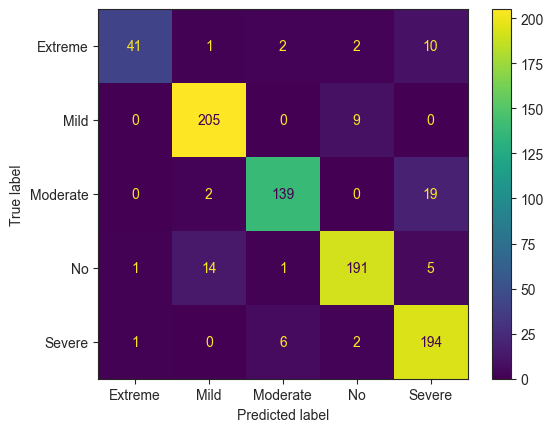

In [448]:
# plot_confusion_matrix function is used to visualize the confusion matrix
CM = confusion_matrix(y_test_sev, y_pred_sev)
TN = CM[0][0]
FN = CM[1][0]
FP = CM[0][1]
TP = CM[1][1]

plot_confusion_matrix(RandomForest, X_test_comb, y_test_sev)
plt.grid(False)
plt.show()

### Converting the Random Forest model into pickle file

In [449]:
import pickle

file_name = 'Final_Model91.pkl'
pickle.dump(RandomForest, open(file_name, 'wb'))

### Decision Tree

In [447]:
DecisionTree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
DecisionTree.fit(X_train_comb, y_train_sev)

score = cross_val_score(DecisionTree, X_combined, y_severity, cv=10)
print(f"Accuracy based on cross_val_score : {score.mean()}")

# Evaluate the performance of the model on the validation set
y_pred_sev = DecisionTree.predict(X_test_comb)

# print(list(y_pred_sev), y_val_sev)
acc_sev = accuracy_score(y_test_sev, y_pred_sev)
print("Accuracy :",acc_sev)
print(classification_report(y_train_sev, DecisionTree.predict(X_train_comb)))
print(classification_report(y_test_sev, DecisionTree.predict(X_test_comb)))

Accuracy based on cross_val_score : 0.7214222491120746
Accuracy : 0.8189349112426035
              precision    recall  f1-score   support

     Extreme       0.85      0.92      0.88       241
        Mild       0.92      0.98      0.95       920
    Moderate       0.98      0.86      0.92       611
          No       0.98      0.90      0.94       762
      Severe       0.91      0.96      0.93       843

    accuracy                           0.93      3377
   macro avg       0.93      0.93      0.92      3377
weighted avg       0.94      0.93      0.93      3377

              precision    recall  f1-score   support

     Extreme       0.70      0.84      0.76        56
        Mild       0.80      0.92      0.86       214
    Moderate       0.87      0.71      0.78       160
          No       0.90      0.75      0.82       212
      Severe       0.78      0.87      0.82       203

    accuracy                           0.82       845
   macro avg       0.81      0.82      0.81   